In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

import os
from PIL import Image, ImageChops, ImageEnhance, ImageFile

In [2]:
def display_side_by_side(image1, image2):
    fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(9,9))
    ax[0].imshow(image1)
    ax[1].imshow(image2)

def ela_substract(image_path, quality):
    """
    No sé si esto esta bien implementado...
    Revisar https://github.com/Ghirensics/ghiro/blob/master/plugins/processing/ela.py
    """
#     path_list = image_path.split('/')
#     original = imageio.imread(image_path)
#     new_path = ''.join(path_list[:-1]) + '/'+ path_list[-1][:path_list[-1].rfind('.')] + \
#                    '_{:d}.jpg'.format(quality)
#     imageio.imwrite(new_path, original, quality=quality)
#     reencoded = imageio.imread(new_path)
#     os.remove(new_path)
#     diff = np.array(original, np.float64) - np.array(reencoded, np.float64)

    path_list = image_path.split('/')     
    new_path = ''.join(path_list[:-1]) + '/'+ path_list[-1][:path_list[-1].rfind('.')] + \
                   '_{:d}.jpg'.format(quality)
    
    im = Image.open(image_path)
    
        
    if im.mode != "RGB":
        im = im.convert("RGB")

    im.save(new_path,"JPEG", quality=quality)
    reencoded = Image.open(new_path)
    os.remove(new_path)

        
    diff = ImageChops.difference(im, reencoded)

    extrema = diff.getextrema()
    
    max_diff = max([ex[1] for ex in extrema])
    
    scale = 255.0/max_diff
    diff = ImageEnhance.Brightness(diff).enhance(scale)
    return im, diff

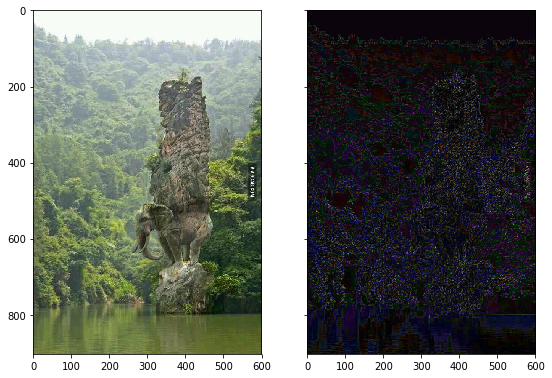

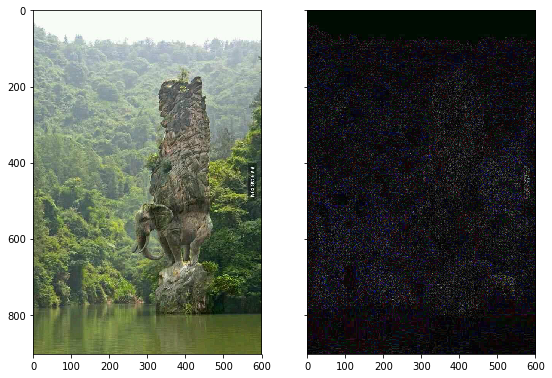

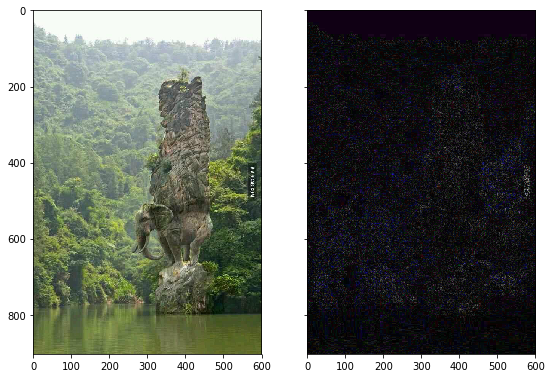

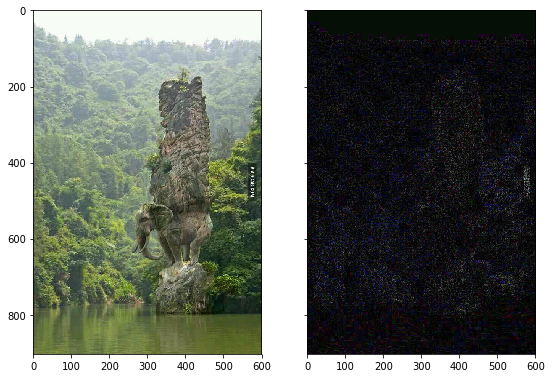

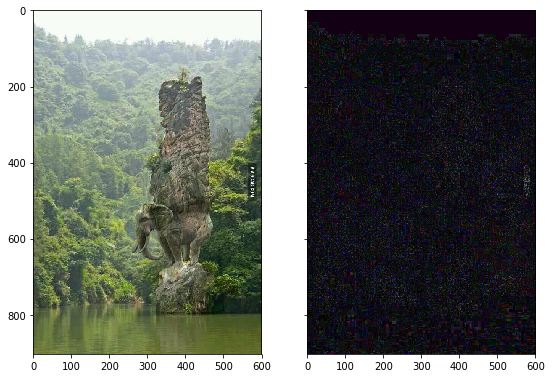

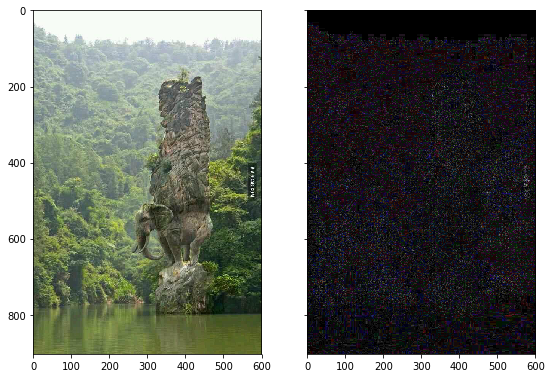

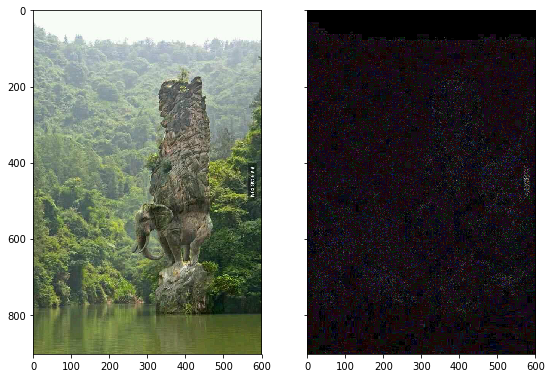

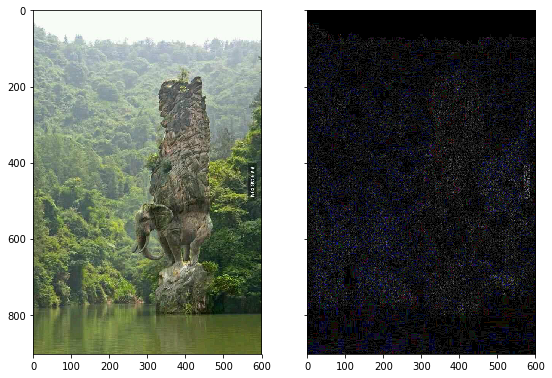

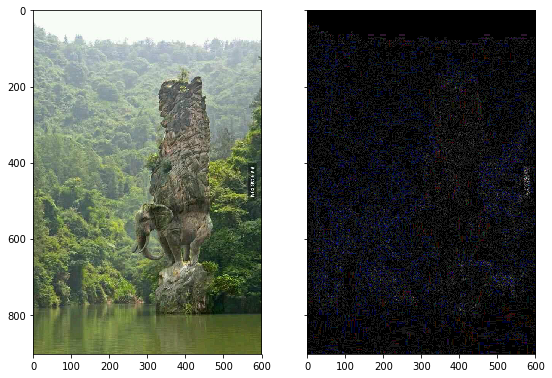

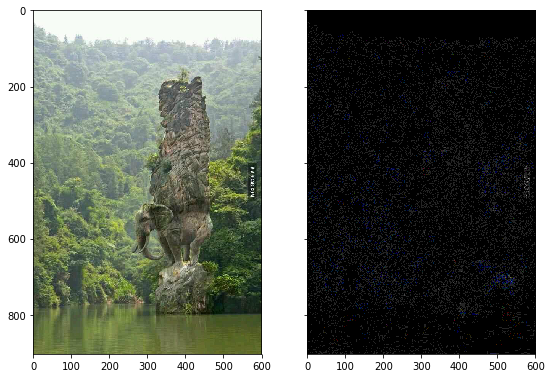

In [8]:
for q in range(1, 100, 10):
    ori, diff = ela_substract('images/image_02.jpg', q)
    display_side_by_side(ori, diff)


In [7]:
ls images

ela_did_work.txt  image_03.png*  image_06.jpg*  image_11.jpg*  ready/
image_02.jpg*     image_04.jpg*  image_08.jpg*  image_14.jpg*


In [7]:
imageio.help('jpeg')

JPEG-PIL - JPEG (ISO 10918)

    A JPEG format based on Pillow.
    
    This format supports grayscale, RGB and RGBA images.
    
    Parameters for reading
    ----------------------
    exifrotate : bool
        Automatically rotate the image according to exif flag. Default True.
    pilmode : str
        From the Pillow documentation:
        
        * 'L' (8-bit pixels, grayscale)
        * 'P' (8-bit pixels, mapped to any other mode using a color palette)
        * 'RGB' (3x8-bit pixels, true color)
        * 'RGBA' (4x8-bit pixels, true color with transparency mask)
        * 'CMYK' (4x8-bit pixels, color separation)
        * 'YCbCr' (3x8-bit pixels, color video format)
        * 'I' (32-bit signed integer pixels)
        * 'F' (32-bit floating point pixels)
        
        PIL also provides limited support for a few special modes, including
        'LA' ('L' with alpha), 'RGBX' (true color with padding) and 'RGBa'
        (true color with premultiplied alpha).
        
     

In [40]:
!ls images

image_01.png  image_04.jpg  image_07.jpg  image_10.jpg	image_13.jpg
image_02.jpg  image_05.png  image_08.jpg  image_11.jpg	image_14.jpg
image_03.png  image_06.jpg  image_09.jpg  image_12.jpg


ModuleNotFoundError: No module named 'lib'